MODEL 1

import TensorFlow, Keras layers, callbacks, and visualization tools

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.regularizers import l2
import tensorflow as tf

Loading and Normalizing MNIST Dataset

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28))/255.0
test_images = test_images.reshape((10000, 28*28))/255.0

Build the Model with Regularization and Dropout

In [9]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,), kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dropout(0.3))

model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10, activation='softmax'))


Adding a Learning Rate Scheduler

In [10]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.9  # Reduce LR by 10% every epoch after 5

lr_scheduler = LearningRateScheduler(scheduler)


Compile the Model

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train the Model

In [12]:
history = model.fit(train_images, train_labels,
                    epochs=15,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler])


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8687 - loss: 0.8915 - val_accuracy: 0.9562 - val_loss: 0.3569 - learning_rate: 0.0010
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9451 - loss: 0.3835 - val_accuracy: 0.9605 - val_loss: 0.3215 - learning_rate: 0.0010
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9484 - loss: 0.3542 - val_accuracy: 0.9586 - val_loss: 0.3153 - learning_rate: 0.0010
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9510 - loss: 0.3352 - val_accuracy: 0.9575 - val_loss: 0.3110 - learning_rate: 0.0010
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9514 - loss: 0.3279 - val_accuracy: 0.9665 - val_loss: 0.2810 - learning_rate: 0.0010
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9568 - loss: 0.2998 - val_accuracy: 0.9677 - val_loss: 0.2526 - learning_rate: 9.0000e-04
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - ac

Evaluate the Model

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)
print("Test loss:",test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.1724
Test Accuracy: 0.978600025177002
Test loss: 0.15614737570285797


Plot Accuracy

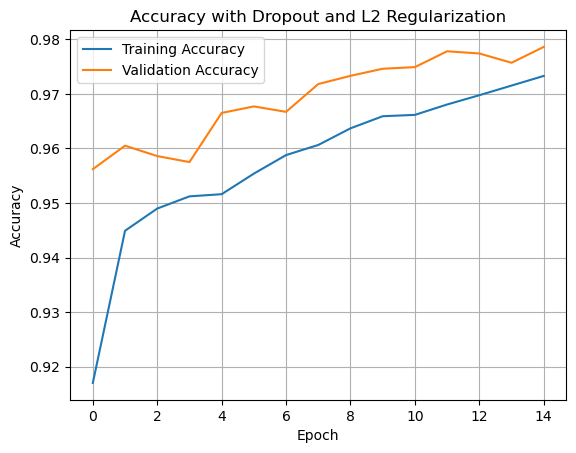

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy with Dropout and L2 Regularization')
plt.legend()
plt.grid(True)
plt.show()


MODEL 2

Import libraries and load data

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [19]:
l1_lambda = 0.001  # L1 regularization strength

model = models.Sequential([
    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l1(l1_lambda),
                 input_shape=(28*28,)),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l1(l1_lambda)),
    layers.Dense(10, activation='softmax')
])

 Compile the model

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Train the model

In [21]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8156 - loss: 7.1173 - val_accuracy: 0.9089 - val_loss: 0.9078
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9058 - loss: 0.8404 - val_accuracy: 0.9231 - val_loss: 0.6542
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9223 - loss: 0.6426 - val_accuracy: 0.9272 - val_loss: 0.5887
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9271 - loss: 0.5841 - val_accuracy: 0.9330 - val_loss: 0.5396
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9322 - loss: 0.5420 - val_accuracy: 0.9317 - val_loss: 0.5214
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9357 - loss: 0.5193 - val_accuracy: 0.9396 - val_loss: 0.5029
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9375 - loss: 0.5015 - val_accuracy: 0.9400 - val_loss: 0.4880
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9371 - loss: 0.4898 - val_accu

 Evaluate the model on test data

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9437 - loss: 0.4598
Test accuracy: 0.9437
Test loss: 0.4598



Plot training & validation loss and accuracy



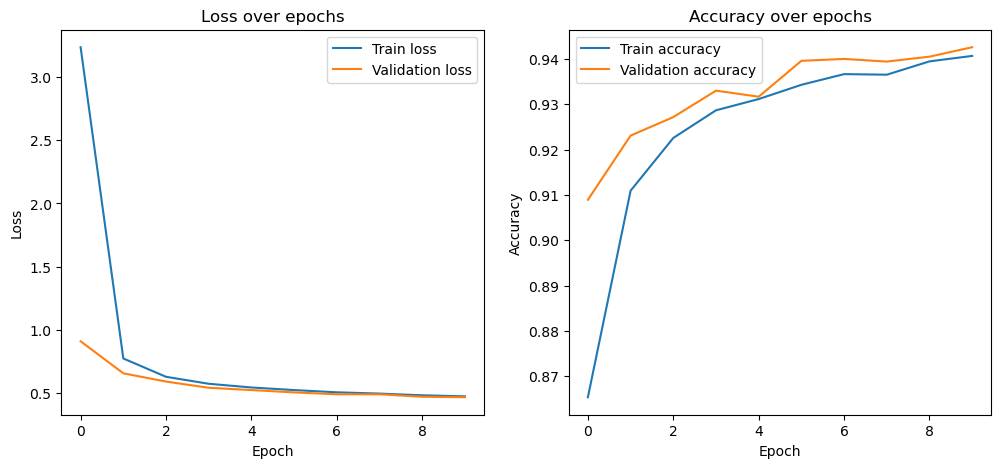

In [24]:
# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Model 1 with L2 regularization, dropout, and learning rate scheduling showed smoother training and validation loss curves, leading to higher and more stable accuracy. The combination helped prevent overfitting and improved generalization on the test set. Model 2, using only L1 regularization, promoted sparsity in the weights but had slightly slower training and more fluctuation in validation loss and accuracy. While L1 can simplify the model by zeroing less important weights, it may require additional techniques like dropout for better stability. Overall, Model 1 performed better in terms of accuracy and generalization on MNIST.